In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("data/Medium_Theater_resilience.csv")

In [4]:
# 월별 매출 데이터 프레임 만들기

data['년도_월'] = pd.to_datetime(data['년도_월'], format='%Y%m')
theaters = data['공연시설코드'].unique()
sales_data = pd.DataFrame({'month': pd.period_range(start='2020-04', end='2022-12', freq='M')})
for theater in theaters:
    theater_data = data[data['공연시설코드'] == theater]   
    all=np.zeros(33) # 33개의 빈공간만들기
    # 월별 매출 매칭하기
    for index, row in theater_data.iterrows():
        all[sales_data['month']==str(row['년도_월'].year)+'-'+str(row['년도_월'].month)] = row['예매/취소금액']
    sales_data[theater]=all
    

# 결과 데이터프레임 출력
print(sales_data)

      month     FC222007    FC222040    FC222048    FC222049    FC222054   
0   2020-04          0.0         0.0         0.0         0.0         0.0  \
1   2020-05          0.0         0.0    100000.0         0.0         0.0   
2   2020-06          0.0         0.0   4622406.0         0.0         0.0   
3   2020-07          0.0         0.0         0.0         0.0    372000.0   
4   2020-08          0.0         0.0   2430000.0   2917573.0         0.0   
5   2020-09          0.0         0.0         0.0         0.0         0.0   
6   2020-10          0.0         0.0         0.0         0.0   9654048.0   
7   2020-11          0.0         0.0         0.0         0.0   4367651.0   
8   2020-12          0.0         0.0         0.0         0.0   3551000.0   
9   2021-01          0.0         0.0         0.0         0.0         0.0   
10  2021-02          0.0         0.0         0.0         0.0         0.0   
11  2021-03     234000.0    451820.0         0.0         0.0   6620100.0   
12  2021-04 

C:\Users\ohke7\AppData\Local\Temp\ipykernel_19340\3700326773.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sales_data[theater]=all
C:\Users\ohke7\AppData\Local\Temp\ipykernel_19340\3700326773.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sales_data[theater]=all
C:\Users\ohke7\AppData\Local\Temp\ipykernel_19340\3700326773.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

In [7]:
expect_sales=pd.read_csv("data/중극장_예상매출액_평균좌석당금액이용.csv")

In [8]:
expect_sales

,공연시설코드,좌석당금액
0,FC222007,1.787785e+07
1,FC222040,4.000000e+06
2,FC222048,3.183153e+07
3,FC222049,2.469018e+06
4,FC222054,1.073887e+07
...,...,...
133,FC223909,1.095971e+08
134,FC223941,1.635869e+07
135,FC224381,1.404000e+06
136,FC224454,1.794000e+06


In [9]:
# 월별 매출 예측을 위해 날짜를 월로 변환

# 모든 극장의 예측매출을 저장할 데이터프레임 생성
theaters = expect_sales['공연시설코드'].unique()
ex_df = pd.DataFrame({'month': pd.period_range(start='2020-04', end='2022-12', freq='M')})

# 월별 예측매출 계산 및 저장
for theater in theaters:
    theater_data = expect_sales[expect_sales['공연시설코드'] == theater]['좌석당금액']   
    ex_df[theater]=int(theater_data)
    

# 결과 데이터프레임 출력
print(ex_df)

      month  FC222007  FC222040  FC222048  FC222049  FC222054  FC222058   
0   2020-04  17877850   4000000  31831533   2469018  10738874   6207056  \
1   2020-05  17877850   4000000  31831533   2469018  10738874   6207056   
2   2020-06  17877850   4000000  31831533   2469018  10738874   6207056   
3   2020-07  17877850   4000000  31831533   2469018  10738874   6207056   
4   2020-08  17877850   4000000  31831533   2469018  10738874   6207056   
5   2020-09  17877850   4000000  31831533   2469018  10738874   6207056   
6   2020-10  17877850   4000000  31831533   2469018  10738874   6207056   
7   2020-11  17877850   4000000  31831533   2469018  10738874   6207056   
8   2020-12  17877850   4000000  31831533   2469018  10738874   6207056   
9   2021-01  17877850   4000000  31831533   2469018  10738874   6207056   
10  2021-02  17877850   4000000  31831533   2469018  10738874   6207056   
11  2021-03  17877850   4000000  31831533   2469018  10738874   6207056   
12  2021-04  17877850   4

C:\Users\ohke7\AppData\Local\Temp\ipykernel_19340\1397286258.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ex_df[theater]=int(theater_data)
C:\Users\ohke7\AppData\Local\Temp\ipykernel_19340\1397286258.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ex_df[theater]=int(theater_data)
C:\Users\ohke7\AppData\Local\Temp\ipykernel_19340\1397286258.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ex_df[theater]=int(theater_data)
C:\Users\ohke7\AppData\Local\Temp\ipykernel_19340\1397286258.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ex_df[theater]=int(theater_data)
C:\Users\ohke7\AppData\Local\Tem

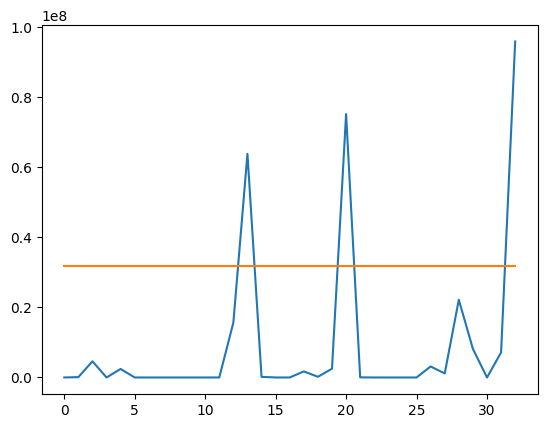

In [20]:
# 예측매출과 실제매출 시각화
x='FC222048'
plt.plot(sales_data[x])
plt.plot(ex_df[x])

In [10]:
#0반영x
final_res=[]
final_rec=[]
final_reducedepth=[] #감소폭
final_reduceperiod=[] #감소기간
final_rec_period=[] #충격지점이후회복기간
final_all_period=[]
t=pd.to_datetime('202003', format='%Y%m').to_period(freq='M') 
theaters = expect_sales['공연시설코드'].unique()
for theater in theaters:
    t4_idx=next((index for index, number in enumerate(ex_df[theater]-sales_data[theater]) if number < 0), None)
    if t4_idx is not None: #2022년12월 내에 회복을 했을 때
        if t4_idx==0 : #2020년 4월(충격지점 한달 후)에 이미 회복을 해버린 경우=침체기가 없는 경우
            res=0
            rec=0
            reducedepth=0
            reduceperiod=0
            rec_period=0
            all_period=0
        else: 
            t4=sales_data.iloc[t4_idx,0]
            temp_real=sales_data[theater][:t4_idx+1]
            tmp=temp_real.replace(0, max(temp_real)*100000) #매출이 0인 지점이 최소가 되지 않게하기 위해
            t3_idx=tmp.idxmin()
            t3=sales_data.iloc[t3_idx,0]
            if (t4-t3).n==0: # 매출이 회복된 지점과 매출의 최저점이 같은 경우 = 침체기가 없는경우
                res=0
                rec=0 
                reducedepth=0
                reduceperiod=0
                rec_period=0
                all_period=0
            else:
                res=(ex_df[theater][t3_idx]-sales_data[theater][t3_idx])/ex_df[theater][t3_idx]
                rec=(sales_data[theater][t4_idx]-sales_data[theater][t3_idx])/(sales_data[theater][t3_idx]*(t4-t3).n)
                reducedepth=ex_df[theater][t3_idx]-sales_data[theater][t3_idx]
                reduceperiod=(t3-t).n
                rec_period=(t4-t3).n
                all_period=(t4-t).n
    else: # 2022년 12월까지 회복을 못했을떄
        res=-100
        rec=-100
        reducedepth=-100
        reduceperiod=-100
        rec_period=-100
        all_period=-100
    final_res.append(res)
    final_rec.append(rec)
    final_reducedepth.append(reducedepth)
    final_reduceperiod.append(reduceperiod)
    final_rec_period.append(rec_period)
    final_all_period.append(all_period)
    print(final_res)
    print(final_rec)

[0.9994406486238557]
[838.0516]
[0.9994406486238557, 0.887045]
[838.0516, 2.5964567994137293]
[0.9994406486238557, 0.887045, 0.9968584610738037]
[838.0516, 2.5964567994137293, 53.15383666666666]
[0.9994406486238557, 0.887045, 0.9968584610738037, 0]
[838.0516, 2.5964567994137293, 53.15383666666666, 0]
[0.9994406486238557, 0.887045, 0.9968584610738037, 0, 0.9653594967219096]
[838.0516, 2.5964567994137293, 53.15383666666666, 0, 2.8646774193548388]
[0.9994406486238557, 0.887045, 0.9968584610738037, 0, 0.9653594967219096, -100]
[838.0516, 2.5964567994137293, 53.15383666666666, 0, 2.8646774193548388, -100]
[0.9994406486238557, 0.887045, 0.9968584610738037, 0, 0.9653594967219096, -100, 0.9280418665503707]
[838.0516, 2.5964567994137293, 53.15383666666666, 0, 2.8646774193548388, -100, 1.0541125541125542]
[0.9994406486238557, 0.887045, 0.9968584610738037, 0, 0.9653594967219096, -100, 0.9280418665503707, 0]
[838.0516, 2.5964567994137293, 53.15383666666666, 0, 2.8646774193548388, -100, 1.054112554

In [11]:
med_info = pd.DataFrame({'공연시설코드': theaters})
med_info['감소폭']=final_reducedepth
med_info['감소기간']=final_reduceperiod
med_info['최저지점이후회복기간']=final_rec_period
med_info['총기간']=final_all_period
med_info['충격반응력']=final_res
med_info['충격회복력']=final_rec

In [17]:
# med_info.to_csv("충격지점이후분석.csv", index=False)
# 충격반응력&충격회복력이 0인 경우: 충격지점 한달 후 바로 회복이 완료된 공연시설
# 충격반영력&충격회복력이 -100인 경우: 2022년 12월 기준으로 회복이 완료되지 않은 공연시설
# 0과 -100이라는 수치는 위 공연시설을 구분하기 위하여 임의로 부여한 숫자임

# 2022년 12월에 모든 극장이 회복을 완료했다면?

In [12]:
theaters = expect_sales['공연시설코드'].unique()
recover=[]
original=[]
for theater in theaters:
    original.append(sales_data[theater][32])
    if ((med_info[med_info['공연시설코드']==theater]['충격회복력']).values==-100):
        recover.append((expect_sales[expect_sales['공연시설코드']==theater]['좌석당금액']).iloc[0])
    elif ((med_info[med_info['공연시설코드']==theater]['충격회복력']).values!=0) : 
        recover.append(sales_data[theater][32])
    else:
        recover.append(sales_data[theater][32])

In [15]:
final_res=[]
final_rec=[]

theaters = expect_sales['공연시설코드'].unique()
for theater in theaters:
    t4_idx=next((index for index, number in enumerate(ex_df[theater]-sales_data[theater]) if number < 0), None)
    if t4_idx is not None: #2022년12월 내에 회복을 했을 때
        if t4_idx==0 : #2020년 4월(충격지점 한달 후)에 이미 회복을 해버린 경우=침체기가 없는 경우
            res=0
            rec=0
        else: 
            t4=sales_data.iloc[t4_idx,0]
            temp_real=sales_data[theater][:t4_idx+1]
            tmp=temp_real.replace(0, max(temp_real)*100000) #매출이 0인 지점이 최소가 되지 않게하기 위해
            t3_idx=tmp.idxmin()
            t3=sales_data.iloc[t3_idx,0]
            if (t4-t3).n==0: # 매출이 회복된 지점과 매출의 최저점이 같은 경우 = 침체기가 없는경우
                res=0
                rec=0 
            else:
                res=(ex_df[theater][t3_idx]-sales_data[theater][t3_idx])/ex_df[theater][t3_idx]
                rec=(sales_data[theater][t4_idx]-sales_data[theater][t3_idx])/(sales_data[theater][t3_idx]*(t4-t3).n)
    else: # 2022년 12월에 회복을 했을 경우를 가정
        t4=sales_data.iloc[32,0]
        temp_real=sales_data[theater][:32] #2022년 12월이 최소가 되면 안되니까 마지막 요소 제외
        tmp=temp_real.replace(0, max(temp_real)*100000) #매출이 0인 지점이 최소가 되지 않게하기 위해
        t3_idx=tmp.idxmin()
        t3=sales_data.iloc[t3_idx,0]
        res=(ex_df[theater][t3_idx]-sales_data[theater][t3_idx])/ex_df[theater][t3_idx]
        rec=(ex_df[theater][32]-sales_data[theater][t3_idx])/(sales_data[theater][t3_idx]*(t4-t3).n)

    final_res.append(res)
    final_rec.append(rec)

    print(final_res)
    print(final_rec)

[0.9994406486238557]
[838.0516]
[0.9994406486238557, 0.887045]
[838.0516, 2.5964567994137293]
[0.9994406486238557, 0.887045, 0.9968584610738037]
[838.0516, 2.5964567994137293, 53.15383666666666]
[0.9994406486238557, 0.887045, 0.9968584610738037, 0]
[838.0516, 2.5964567994137293, 53.15383666666666, 0]
[0.9994406486238557, 0.887045, 0.9968584610738037, 0, 0.9653594967219096]
[838.0516, 2.5964567994137293, 53.15383666666666, 0, 2.8646774193548388]
[0.9994406486238557, 0.887045, 0.9968584610738037, 0, 0.9653594967219096, 0.9809033461273751]
[838.0516, 2.5964567994137293, 53.15383666666666, 0, 2.8646774193548388, 51.36519479642972]
[0.9994406486238557, 0.887045, 0.9968584610738037, 0, 0.9653594967219096, 0.9809033461273751, 0.9280418665503707]
[838.0516, 2.5964567994137293, 53.15383666666666, 0, 2.8646774193548388, 51.36519479642972, 1.0541125541125542]
[0.9994406486238557, 0.887045, 0.9968584610738037, 0, 0.9653594967219096, 0.9809033461273751, 0.9280418665503707, 0]
[838.0516, 2.596456799

In [16]:
complete_recover = pd.DataFrame({'공연시설코드': theaters})
complete_recover['충격반응력']=final_res
complete_recover['충격회복력']=final_rec

In [33]:
# complete_recover.to_csv("회복모두완료된극장의분석.csv", index=False)